In [2]:
from pathlib import Path
import mdtraj as md
from celerity.dataloader import TrajectoryDataset, DataLoader
from celerity.featurizer import Dihedrals, Contacts
import h5py
import numpy as np

import deeptime as dt
import seaborn as sns
from itertools import combinations
import pandas as pd

In [3]:
data_dir = 'data'
traj_file = f"{data_dir}/trajectory.h5"


In [4]:
# transform = Dihedrals(dict(topology_path = f'{data_dir}/topology.pdb', 
                        #    which=['phi', 'psi','chi1', 'chi2', 'chi3', 'chi4', 'chi5'], 
                        #    coosin=True))
transform = Contacts(dict(topology_path = f"{data_dir}/topology.pdb", scheme='closest-heavy'))

dataset = TrajectoryDataset(dict(traj_paths_pattern=str(traj_file), 
                                 stride=100))
loader = DataLoader(dict(batch_size=1000, 
                         transform=transform, 
                         dataset=dataset)) 

In [5]:
contacts = np.concatenate([x for x in loader])


In [10]:
columns = [f"{x}-{y}" for x, y in zip(transform.features, transform.labels)]
df = pd.DataFrame(contacts, columns=columns)
df['time_ns'] = np.arange(df.shape[0])*0.1
df = df.melt(id_vars='time_ns')

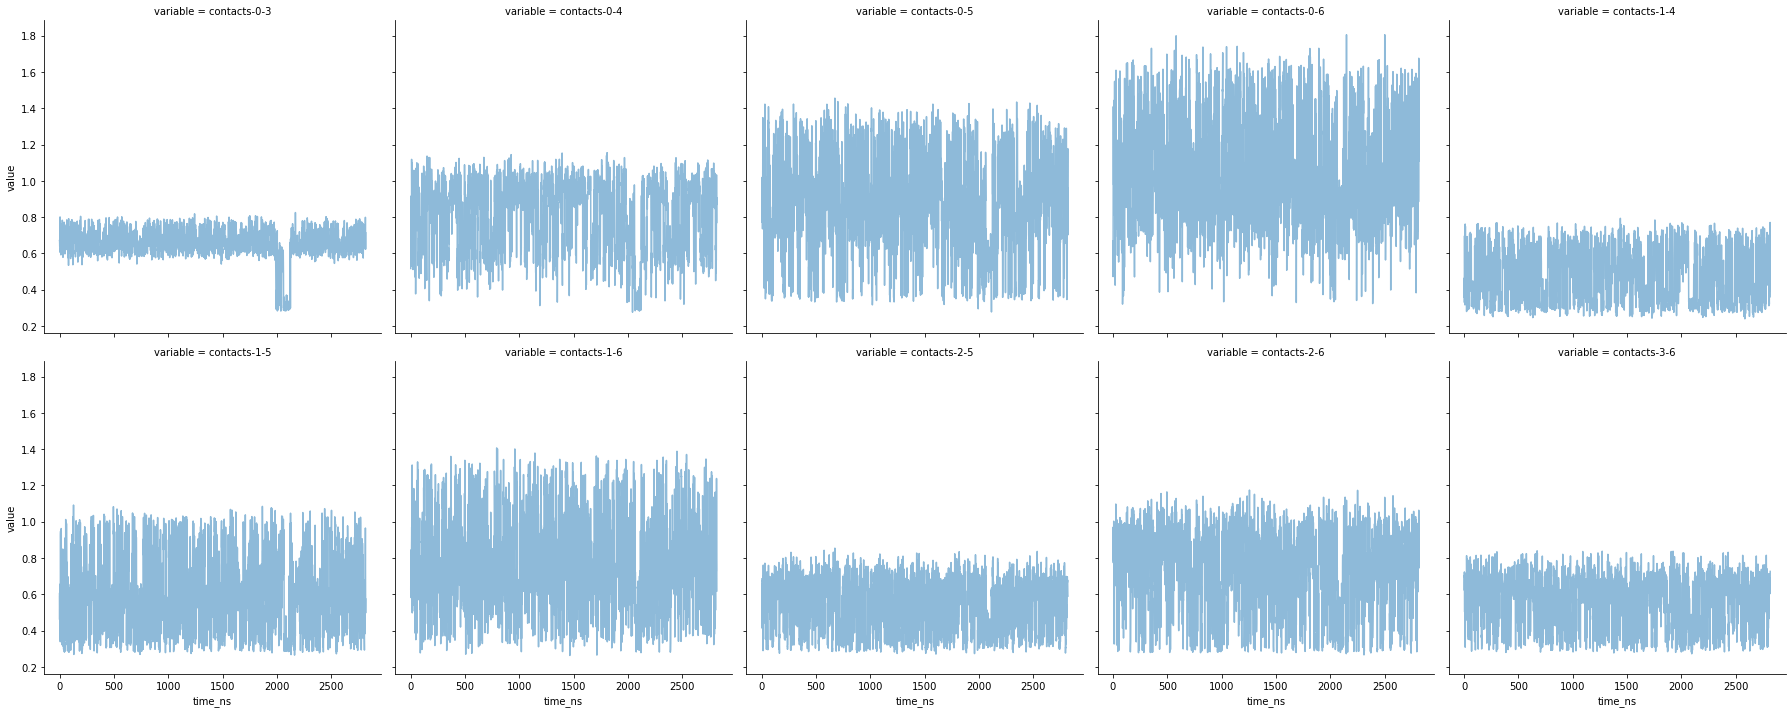

In [14]:
sns.relplot(data=df.iloc[::10, :], x='time_ns', y='value', col='variable', col_wrap=5, kind='line', alpha=0.5)

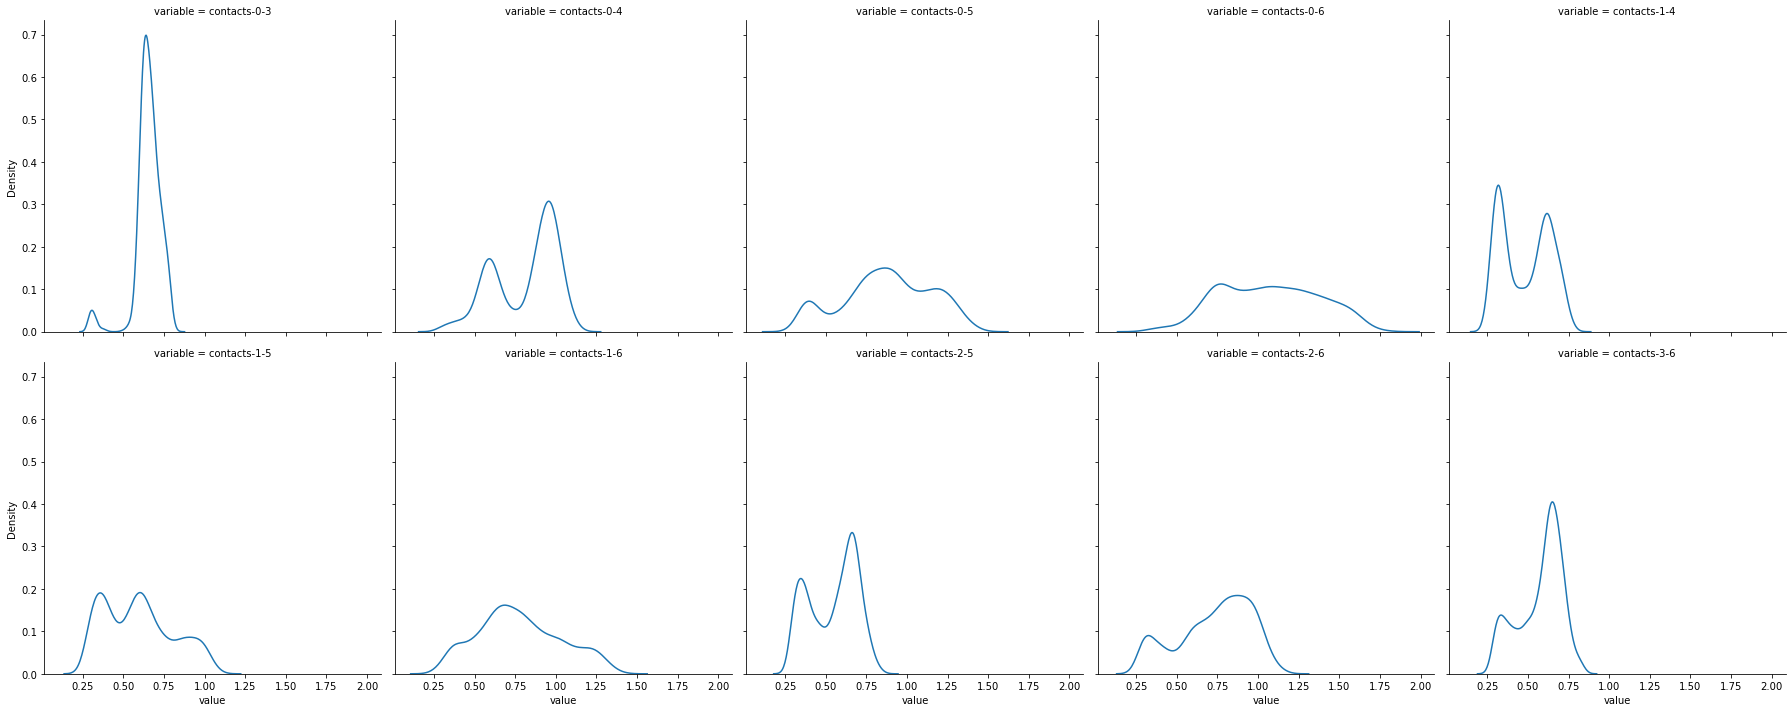

In [16]:
sns.displot(data=df.iloc[::10, :], x='value', col='variable', col_wrap=5, kind='kde' )

In [17]:
transform = Dihedrals(dict(topology_path = f'{data_dir}/topology.pdb', 
                           which=['phi', 'psi','chi1', 'chi2', 'chi3', 'chi4', 'chi5'], 
                           cossin=False))
dataset = TrajectoryDataset(dict(traj_paths_pattern=str(traj_file), 
                                 stride=100))
loader = DataLoader(dict(batch_size=1000, 
                         transform=transform, 
                         dataset=dataset)) 

In [18]:
dihedrals = np.concatenate([x for x in loader])

In [19]:
columns = [f"{x}-{y}" for x, y in zip(transform.features, transform.labels)]
df2 = pd.DataFrame(dihedrals, columns=columns)
df2['time_ns'] = np.arange(df2.shape[0])*0.1
df2 = df2.melt(id_vars='time_ns')

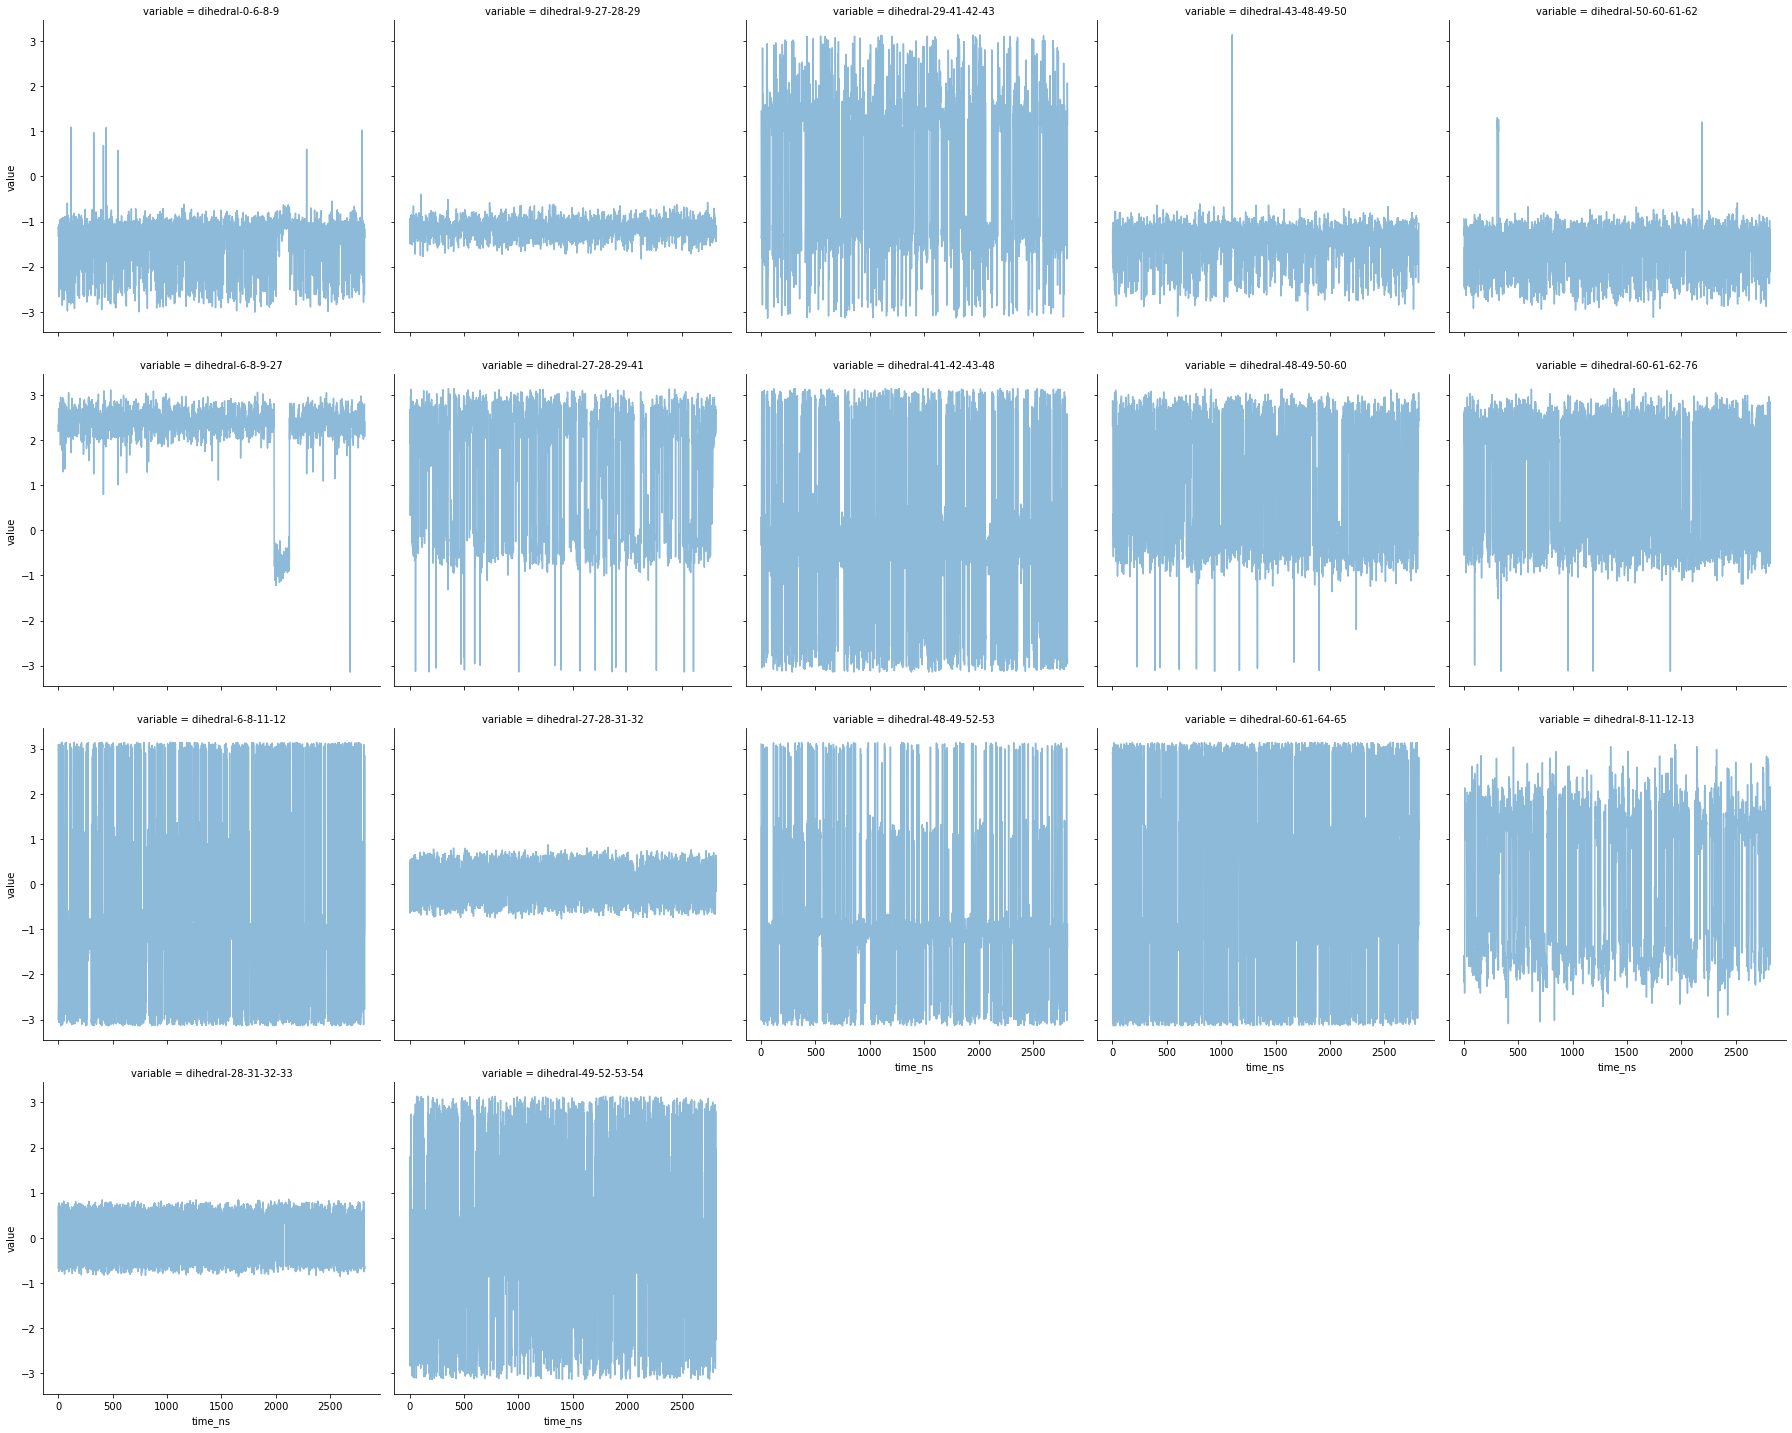

In [20]:
sns.relplot(data=df2.iloc[::10, :], x='time_ns', y='value', col='variable', col_wrap=5, kind='line')

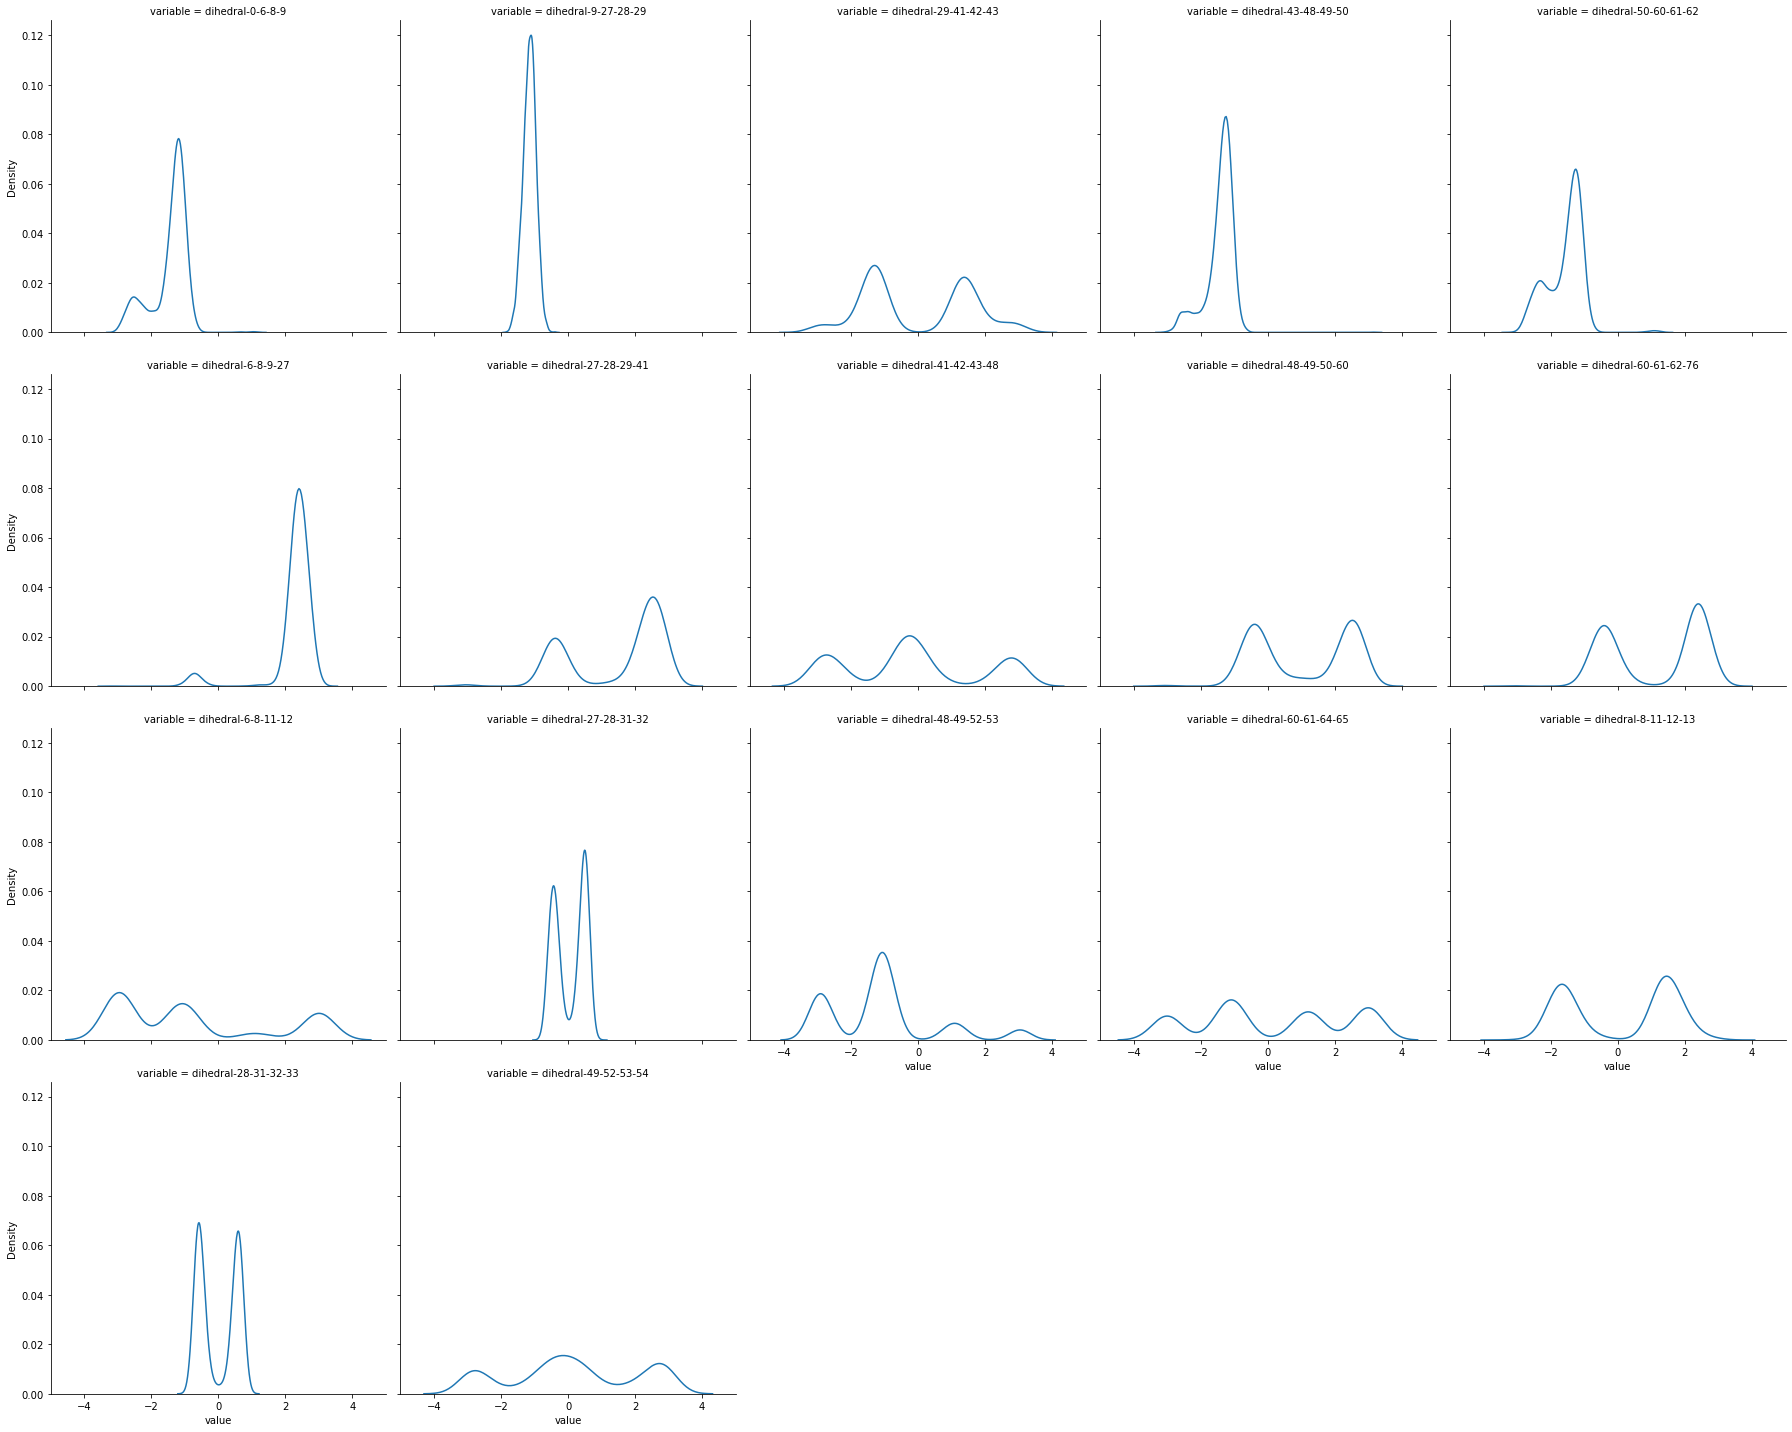

In [21]:
sns.displot(data=df2.iloc[::10, :], x='value', col='variable', col_wrap=5, kind='kde' )